<a href="https://colab.research.google.com/github/Mahima2208/Airline_Passenger_Referal_Prediction_Classification/blob/main/AIRLINE_PASSENGER_REFERAL_PREDICTION_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Any child who sees a plane in the sky fantasises about riding in it. Traveling by plane has become a craze, and as an adult, one will consider taking care of the experience. As a result, the opinions of those who have travelled have become increasingly important. This improved people's positive travel experiences, as well as the airlines' ability to understand what their customers are feeling and this increased the amount of room for improvement that airlines can do.**


# **The main objective of this project is to predict whether passengers will refer the airline to their friends. In this project we deployed multiple machine learning models to see the performance.**

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with
multiple choice and free text questions. Data is scraped in Spring 2019. The main objective
is to predict whether passengers will refer the airline to their friends.

In [362]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm
%matplotlib inline
import seaborn as sns
import math
import scipy.stats as stat
from datetime import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

In [363]:
# Mounting drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [364]:
# Reading dataset.
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/Classification/data_airline_reviews.xlsx')

In [365]:
# first look of the dataset.
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [366]:
# first look of the dataset.
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [367]:
# Shape of the dataset.
df.shape

(131895, 17)

In [368]:
# Columns available
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

# **Feature descriptions briefly as follows:**

**airline:** Name of the airline.

**overall:** Overall point is given to the trip between 1 to 10.

**author:** Author of the trip

**reviewdate:** Date of the Review customer review: Review of the customers in free text format

**aircraft:** Type of the aircraft

**travellertype:** Type of traveler (e.g. business, leisure)

**cabin:** Cabin at the flight date flown: Flight date

**seatcomfort:** Rated between 1-5

**cabin service:** Rated between 1-5

**foodbev:** Rated between 1-5 entertainment: Rated between 1-5

**groundservice:** Rated between 1-5

**valueformoney:** Rated between 1-5

**recommended:** Binary, target variable.

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [370]:
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [371]:
# Count of null or missing values.
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [372]:
df1 = df.copy()

# Making a copy of the dataset so as to keep the original data intact.

In [373]:
# Removing unnecessary columns.
airline_df = df1.drop(['author','aircraft','date_flown','route','review_date','customer_review'],axis = 1)

# These columns does not have any significance in predictive analysis and also contains huge null values, so its been removed.

In [374]:
#Counting number of duplicate values
airline_df.duplicated().sum()

85121

In [375]:
#Removing the duplicates
airline_df.drop_duplicates(keep='first', inplace = True)

In [376]:
#Counting number of duplicate values
airline_df.duplicated().sum()

0

In [377]:
numerical_df = airline_df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

In [378]:
# Filling null values with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numerical_df = pd.DataFrame(imputer.fit_transform(numerical_df),columns = numerical_df.columns)

In [379]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46774 entries, 0 to 46773
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          46774 non-null  float64
 1   seat_comfort     46774 non-null  float64
 2   cabin_service    46774 non-null  float64
 3   food_bev         46774 non-null  float64
 4   entertainment    46774 non-null  float64
 5   ground_service   46774 non-null  float64
 6   value_for_money  46774 non-null  float64
dtypes: float64(7)
memory usage: 2.5 MB


In [380]:
airline_df = airline_df.drop(columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [381]:
airline_df = pd.concat([airline_df.reset_index(),numerical_df.reset_index()], axis =1)

In [382]:
airline_df.isnull().sum()

index                  0
airline                1
traveller_type     17023
cabin                969
recommended          493
index                  0
overall                0
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
dtype: int64

In [383]:
# droping the rows which have all values as NaN
airline_df.dropna(axis=0,how='any',inplace = True)

In [384]:
airline_df = airline_df.dropna(subset=['recommended'])

In [385]:
airline_df.isnull().sum()

index              0
airline            0
traveller_type     0
cabin              0
recommended        0
index              0
overall            0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
dtype: int64

In [386]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29731 entries, 1 to 46705
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            29731 non-null  int64  
 1   airline          29731 non-null  object 
 2   traveller_type   29731 non-null  object 
 3   cabin            29731 non-null  object 
 4   recommended      29731 non-null  object 
 5   index            29731 non-null  int64  
 6   overall          29731 non-null  float64
 7   seat_comfort     29731 non-null  float64
 8   cabin_service    29731 non-null  float64
 9   food_bev         29731 non-null  float64
 10  entertainment    29731 non-null  float64
 11  ground_service   29731 non-null  float64
 12  value_for_money  29731 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 3.2+ MB


In [387]:
import plotly.express as px

fig = px.pie(airline_df['cabin'], values=airline_df['cabin'].value_counts(),names=['Economy Class','Business Class','PremiumEconomy','First Class'], 
             hole = 0.4,color_discrete_sequence=px.colors.sequential.RdBu,width=700,height=500)
fig.show()

# 77% of the passengers are economy class traveller.

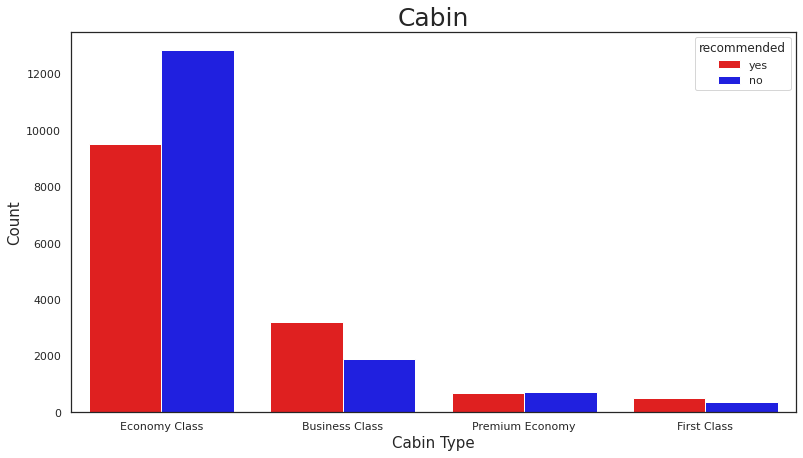

In [388]:
# Most recommended cabin.
plt.figure(figsize=(13,7))
sns.set_theme(style="white")

sns.countplot(airline_df['cabin'],hue=airline_df['recommended'],palette=['red','blue'])
plt.title('Cabin',fontsize = 25)
plt.xlabel('Cabin Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# So, economy class has the most recommendation whereas first class has the least recommendation.

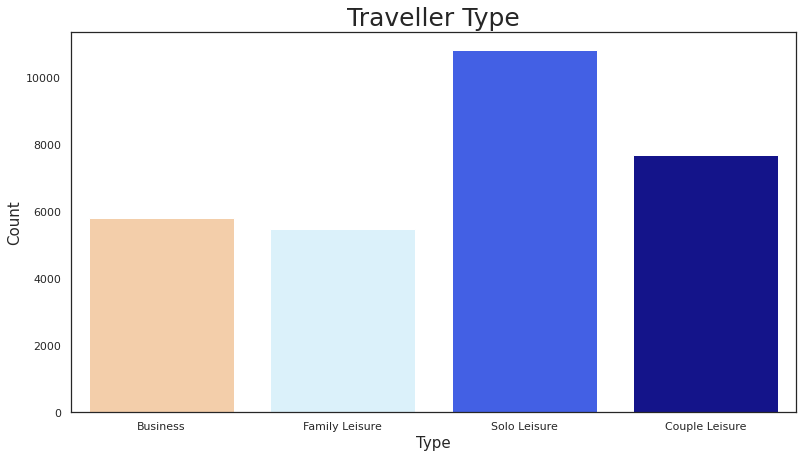

In [389]:
# Traveller type with most ratings.
plt.figure(figsize = (13,7))
sns.set_theme(style="white")
sns.countplot(airline_df['traveller_type'],palette="flag")
plt.title('Traveller Type',fontsize = 25)
plt.xlabel('Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# Its clear from the countplot that 'Solo Leisure' has highest ratings among all whereas 'Family Leisure' has the least ratings.

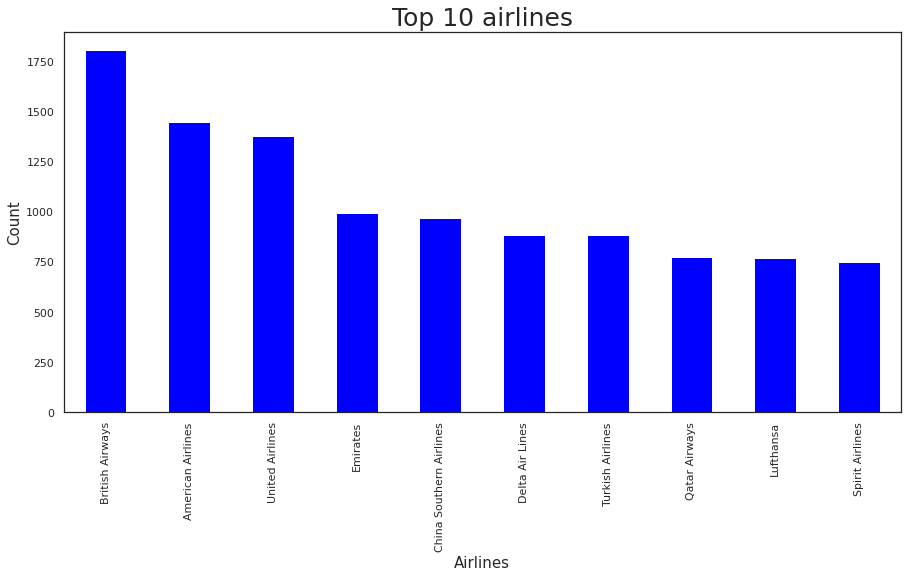

In [390]:
air=airline_df['airline'].value_counts()
# Visualisation of top 10 airlines in the dataset.
sns.set_theme(style="white")
plt.figure(figsize=(15,7))
air[:10].plot(kind='bar',color ='#0000FF')
plt.title('Top 10 airlines',fontsize=25)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

# 'Sprint airlines' has the maximum number of trips and this can be attributed to its ultra low cost fare compared to other airlines.

In [391]:
# Count of target variable (recommended).
airline_df['recommended'].value_counts()

# It is a binary classification problem.

no     15817
yes    13914
Name: recommended, dtype: int64

In [392]:
import plotly.express as px

px.histogram(airline_df, x="recommended",color="recommended",template="simple_white",width=700,height=500)

In [393]:
# Mapping the target feature with numerical data.
airline_df['recommended']=airline_df['recommended'].map({'yes':1,'no':0})


In [394]:
airline_df.drop(columns='index',inplace=True)

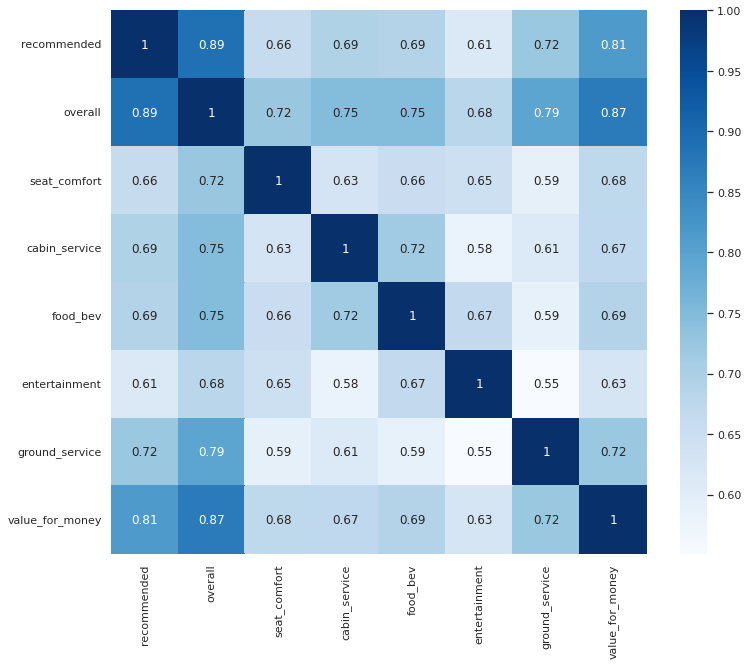

In [395]:
# Correlation.
plt.figure(figsize=(12,10))
sns.heatmap(airline_df.corr(), annot=True, cmap='Blues')
plt.show()


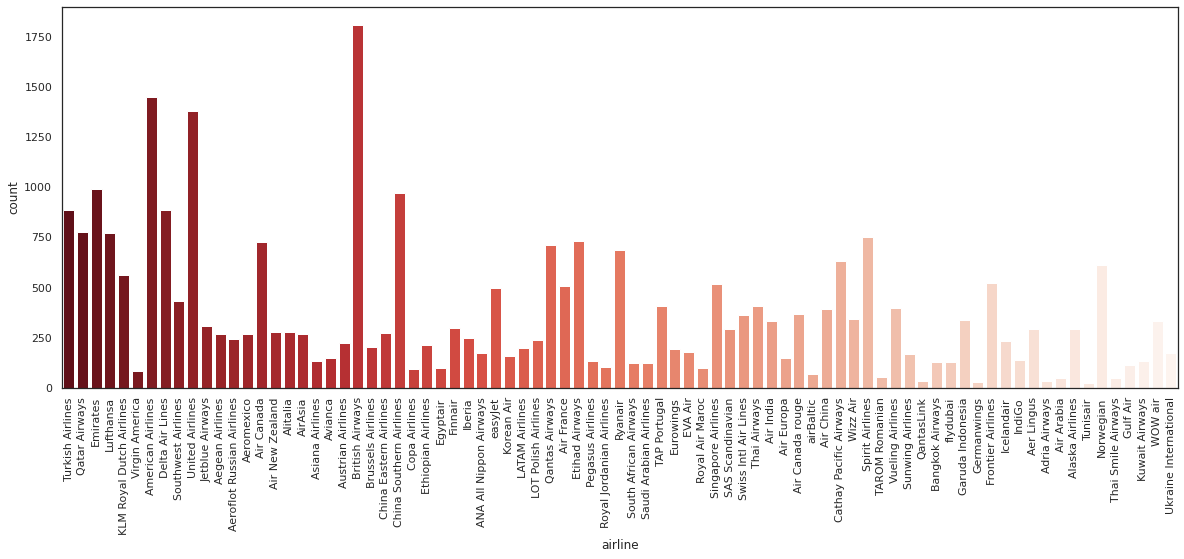

In [396]:
sns.set(rc={'figure.figsize':(20,7)})
sns.set_theme(style="white")
category_count=sns.countplot(x="airline",data=airline_df,palette="Reds_r")
category_count.set_xticklabels(category_count.get_xticklabels(), rotation=90)
sns.set_style("whitegrid")

In [397]:
features=airline_df.columns

In [398]:
features

Index(['airline', 'traveller_type', 'cabin', 'recommended', 'overall',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money'],
      dtype='object')

In [399]:
features_1= features.drop(['airline','recommended'])

traveller_type


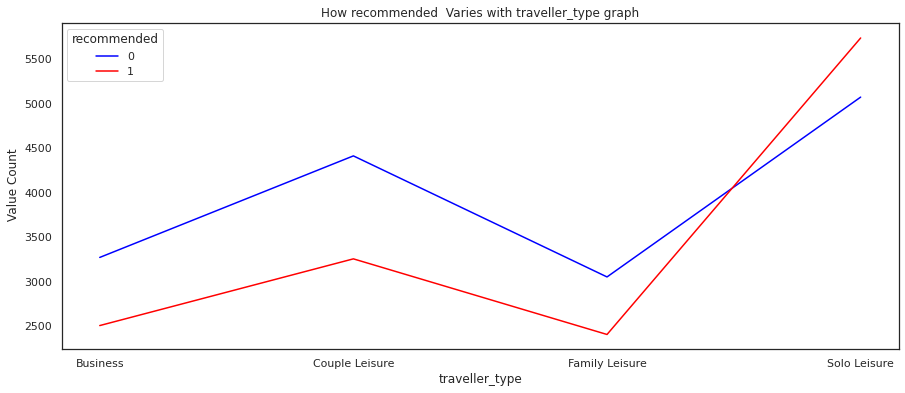

cabin


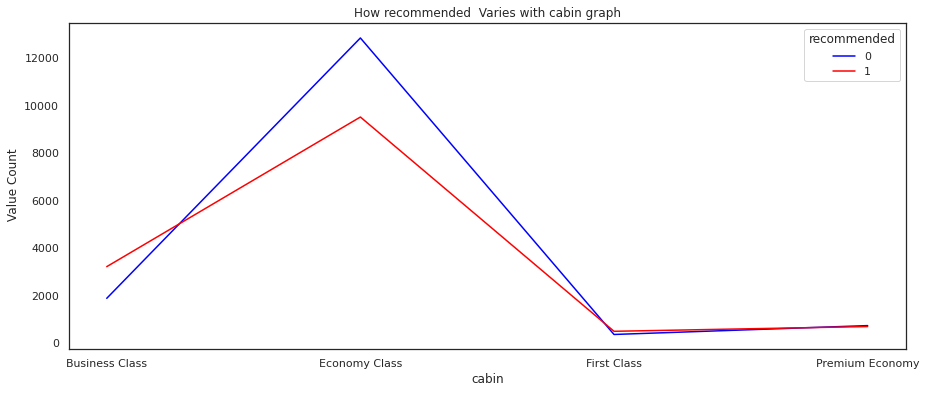

overall


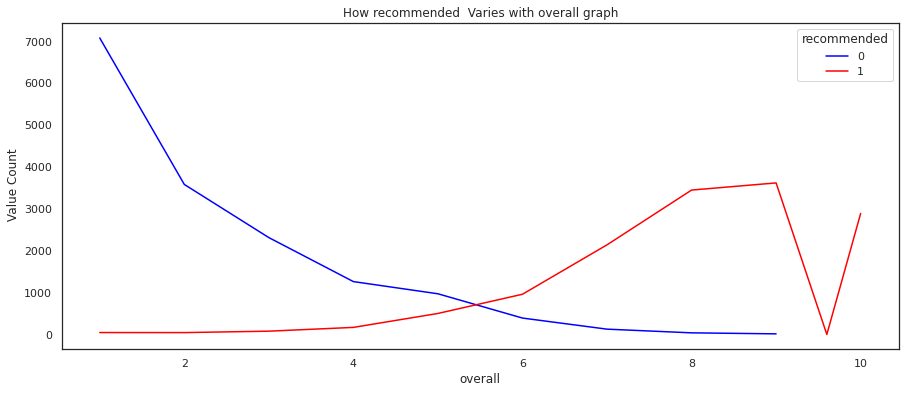

seat_comfort


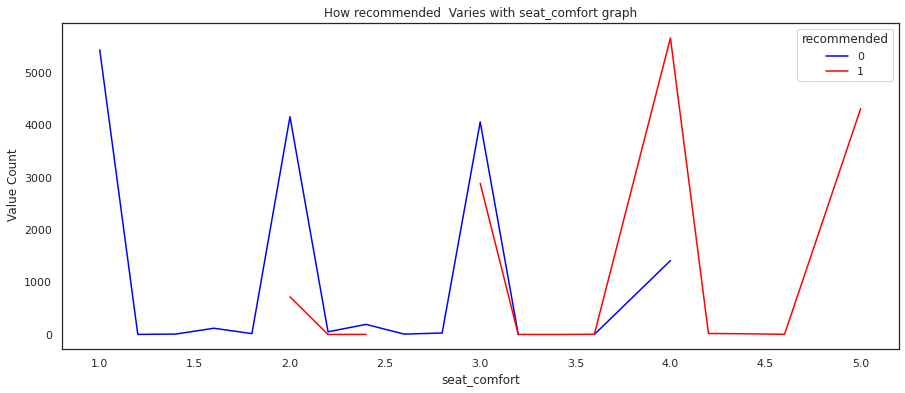

cabin_service


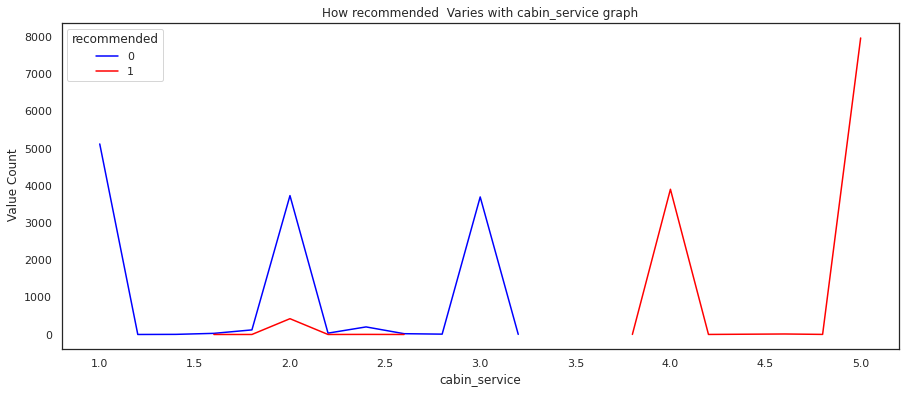

food_bev


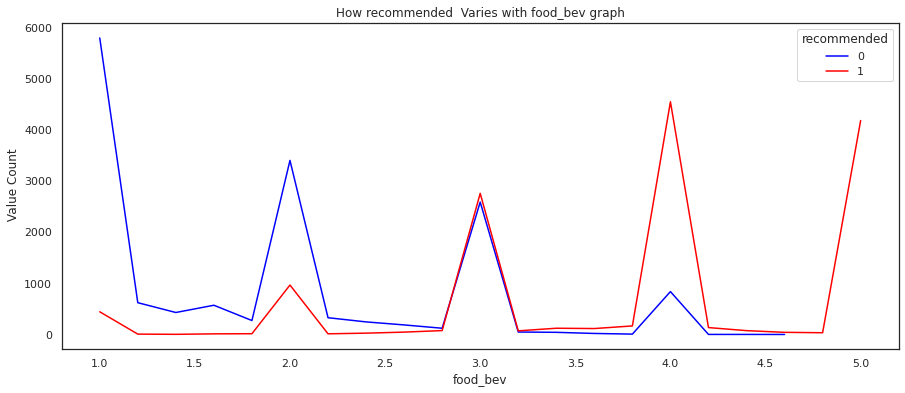

entertainment


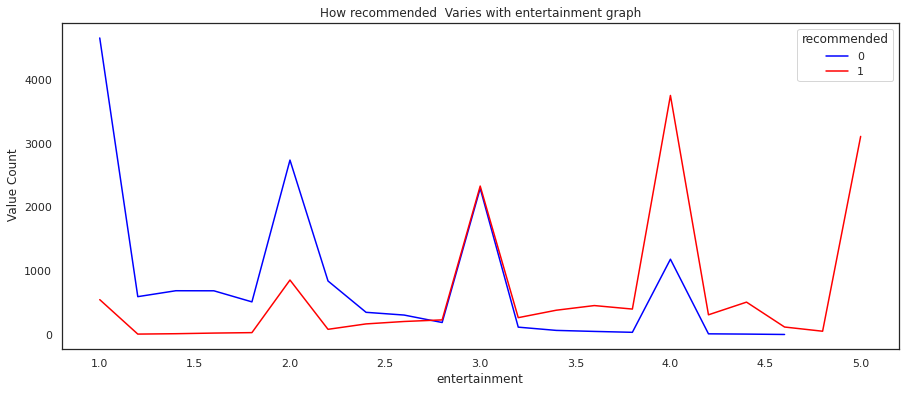

ground_service


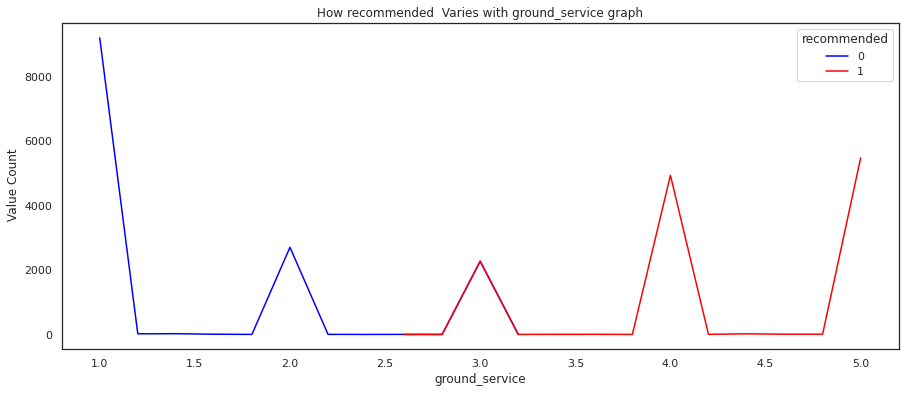

value_for_money


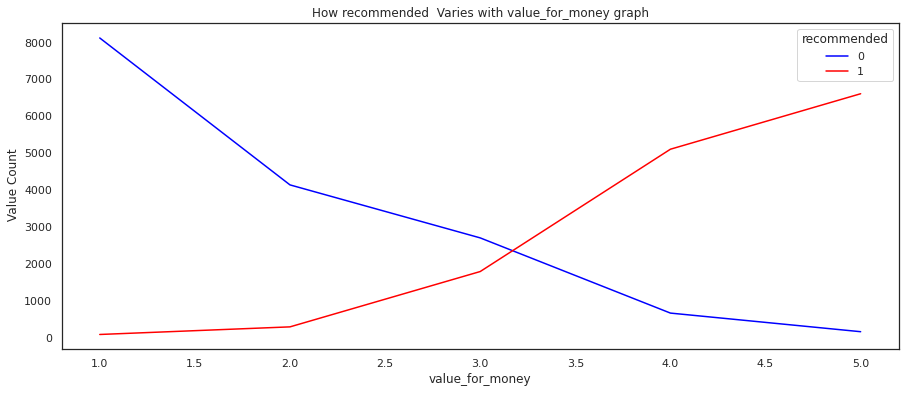

In [400]:
for feature in features_1:
  print(feature)
  sns.set_theme(style="white")
  airline_df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6),color=['blue','red'])
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

In [401]:
airline_df.drop(["airline"], axis = 1, inplace = True)

# Dropping the 'airline' column as it is no more needed for further predictive analysis.

In [402]:

traveller_type = pd.get_dummies(airline_df['traveller_type'],drop_first=True)
airline_df = pd.concat([airline_df,traveller_type],axis='columns')

cabin = pd.get_dummies(airline_df['cabin'],drop_first=True)
airline_df = pd.concat([airline_df,cabin],axis='columns')

airline_df.drop(['traveller_type','cabin'],axis=1,inplace=True)

In [403]:
# Segregating dependent variable (target variable) and independent variables (input variable).
X = airline_df.drop(['recommended'],axis=1)      # Independent or input variable.
Y = airline_df['recommended']                    # Dependent or target variable.

In [404]:
Y.value_counts()[0]/len(Y)*100

53.200363257206284

In [405]:
Y.value_counts()[1]/len(Y)*100

46.799636742793716

In [406]:
# Splitting the data.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# Training dataset is 80% of total dataset.
# Testing dataset is 20% of total dataset.

In [407]:
# Shape of X_train and X_test data.
print(X_train.shape)
print(X_test.shape)

(23784, 13)
(5947, 13)


In [408]:
# Shape of Y_train and Y_test data.
print(Y_train.shape)
print(Y_test.shape)

(23784,)
(5947,)


In [409]:
# Declaring a dataset for storing the evaluation metrics for each of the model.
column_names = ["MODEL NAME", "ACCURACY", "RECALL","PRECISION","F1-SCORE","ROC AUC SCORE"]
metrics_df = pd.DataFrame(columns = column_names)

In [410]:
def add_metrics_details(model_name,Y_test,Y_pred,df):
  df = df.append({'MODEL NAME': model_name, 
                  'ACCURACY':accuracy_score(Y_test, Y_pred), 
                  'RECALL': recall_score(Y_test, Y_pred),
                  'PRECISION':precision_score(Y_test, Y_pred),
                  'F1-SCORE':f1_score(Y_test, Y_pred),
                  'ROC AUC SCORE':roc_auc_score(Y_test,Y_pred)}
                  ,ignore_index=True)
  return df

# **MODEL IMPLEMENTATION**

**1.Logistic Regression**

In [411]:
#Initializing Logistic Model object

logistic_regression_clf= LogisticRegression(fit_intercept=True, max_iter=10000)
#Taining a model with x and y
logistic_regression_clf.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [412]:
logistic_regression_clf.coef_

array([[ 0.9824317 ,  0.18125567,  0.22109211,  0.15028239,  0.03803753,
         0.24436655,  0.67784735, -0.39602124, -0.18627012, -0.03861502,
         0.06978491, -0.39857085, -0.20938937]])

In [413]:
logistic_regression_clf.intercept_

array([-9.70035453])

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3136
           1       0.95      0.95      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.29174373633765%



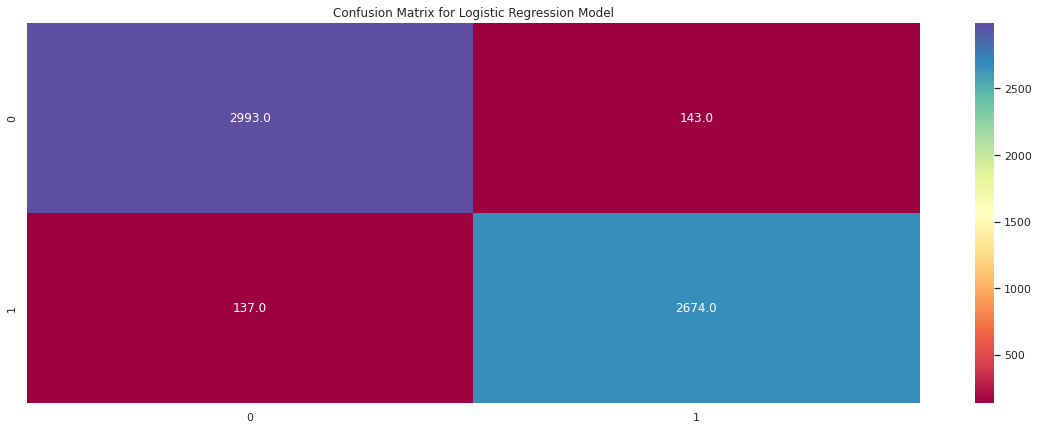

In [414]:
# Evaluation of the logistic regression model.
Y_pred = logistic_regression_clf.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Spectral")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

In [415]:
# Adding model performance in evaluation metric dataframe that create above 
metrics_df = add_metrics_details("Logistic Regression",Y_test,Y_pred,metrics_df)

**2.Decision tree**

In [416]:
#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier()
#Taining a model with x and y
tree_classify.fit(X_train,Y_train)

DecisionTreeClassifier()

In [417]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(X_train,Y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(X_test,Y_test))

Training Accuracy of Decision Tree Model is 0.9953329969727548
Testing Accuracy of Decision Tree Model is 0.9244997477719858


In [418]:
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [419]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [420]:
#calling an best params
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [421]:
#calling an best score
tree_cv.best_score_

0.9511436203174888

**Fitting the Best estimators After Hyperparameter tuning for Decision tree**

In [422]:
#Fitting an best parameters to Decision tree Model
final_tree_after_hyper_param_tune=tree_cv.best_estimator_
final_tree_after_hyper_param_tune.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3136
           1       0.95      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.08996132503783%



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree  Model')

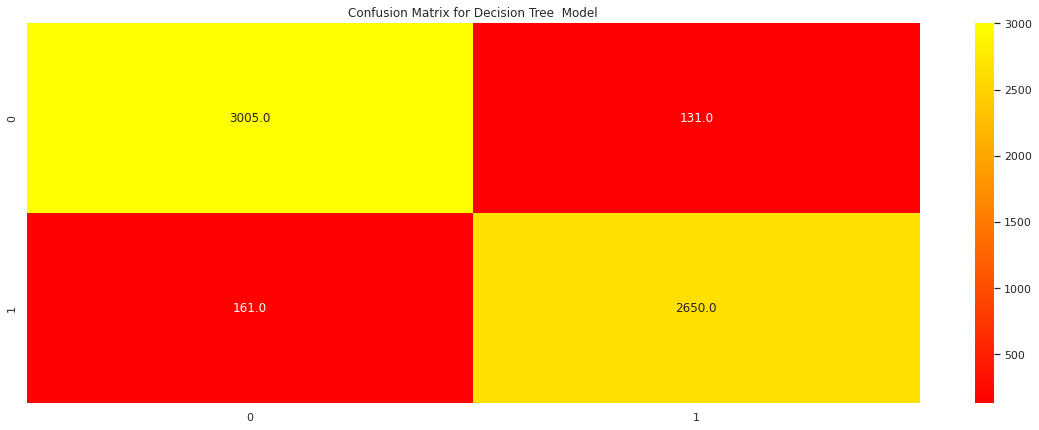

In [423]:
# Evaluation of the decision tree model
Y_pred = final_tree_after_hyper_param_tune.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="autumn")
plt.title("Confusion Matrix for Decision Tree  Model")

In [424]:
# Adding model performance in evaluation metric dataframe.
metrics_df = add_metrics_details("Decision Tree",Y_test,Y_pred,metrics_df)

## 3. Ensembles of Decision Trees

3.1 Bagging

**3.1.1 Random forest**

In [425]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
rf.score(X_test, Y_test)

0.9508996132503783

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3136
           1       0.95      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.08996132503783%



Text(0.5, 1.0, 'Confusion Matrix for Random Forest  Model')

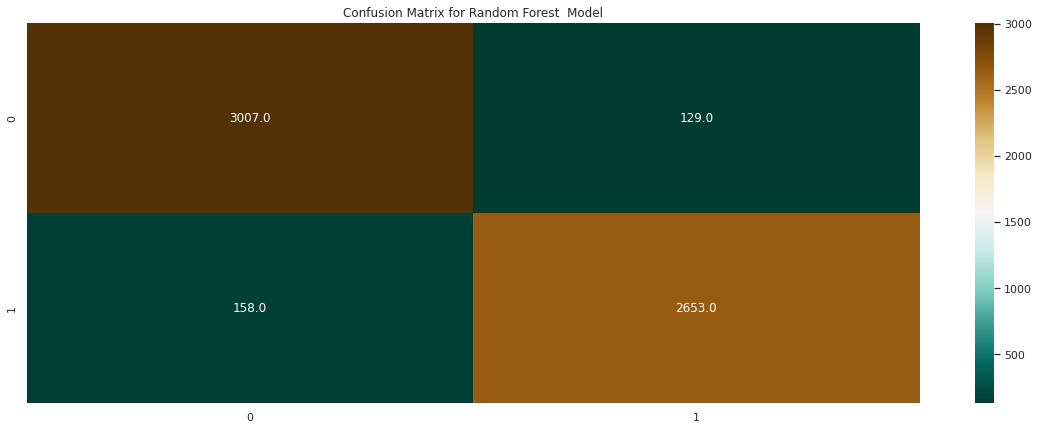

In [426]:
#Evaluation of the model
Y_pred = rf.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="BrBG_r")
plt.title("Confusion Matrix for Random Forest  Model")

In [427]:
# Adding model performance in evaluation metric dataframe.
metrics_df = add_metrics_details("Random Forest",Y_test,Y_pred,metrics_df)

**RANDOM FOREST (GridSearchCV)**

In [428]:
# Hyperparameter tuning.
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [429]:
rf_gridcv = GridSearchCV(estimator=rf,
                       param_grid = param_dict,
                       cv = 5, verbose=2)
# Evaluating the optimal parameters.
rf_gridcv.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.6s
[CV] END max_depth=6, min_sa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [430]:
# Best estimator.
rf_gridcv.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=30, min_samples_split=10)

In [431]:
# Best parameter.
rf_gridcv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 30,
 'min_samples_split': 10,
 'n_estimators': 100}

In [432]:
rf_gridcv_best = rf_gridcv.best_estimator_
Y_pred = rf_gridcv_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3136
           1       0.96      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.2076677316294%



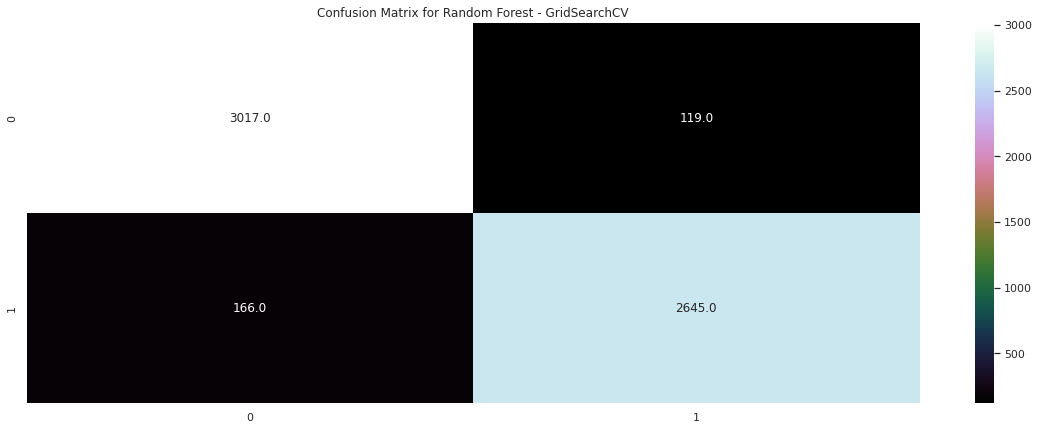

In [433]:
# Evaluation of the model
Y_pred = rf_gridcv_best.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cubehelix")
plt.title("Confusion Matrix for Random Forest - GridSearchCV")
plt.show()

In [434]:
# Adding model performance in evaluation metric dataframe.
metrics_df = add_metrics_details("Random Forest - GridSearchCV",Y_test,Y_pred,metrics_df)

## 3.2 Boosting

3.2.1 XGBoost

In [435]:
import xgboost as xgb

#xgboost model
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,Y_train)
score=xgb_model.score(X_test,Y_test)
print(f'XGBoost score : {score}')


XGBoost score : 0.9534218933916261


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3136
           1       0.96      0.95      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.34218933916262%



Text(0.5, 1.0, 'Confusion Matrix for XGBoost')

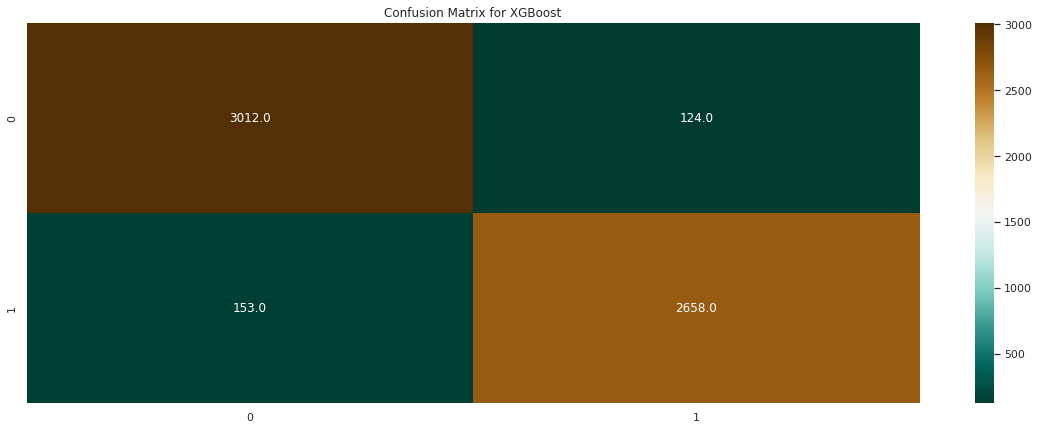

In [436]:
#Evaluation of the model
Y_pred = xgb_model.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="BrBG_r")
plt.title("Confusion Matrix for XGBoost")

In [437]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details(" XGBoost",Y_test,Y_pred,metrics_df)

XGBoost gridsearch cv

In [438]:
# Hyperparameter tuning.
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [439]:
xgboost_gridseach_cv = GridSearchCV(estimator=xgb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)
# Evaluating the optimal parameters.
xgboost_gridseach_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_sa

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [440]:
xgboost_gridseach_cv.best_estimator_

XGBClassifier(max_depth=6, min_samples_leaf=30, min_samples_split=10,
              n_estimators=50)

In [441]:
xgboost_gridseach_cv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 30,
 'min_samples_split': 10,
 'n_estimators': 50}

In [442]:
xg_model_gridcv_best = xgboost_gridseach_cv.best_estimator_

In [443]:
Y_pred = xg_model_gridcv_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3136
           1       0.96      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.39263494198755%



Text(0.5, 1.0, 'Confusion Matrix for XGBoost')

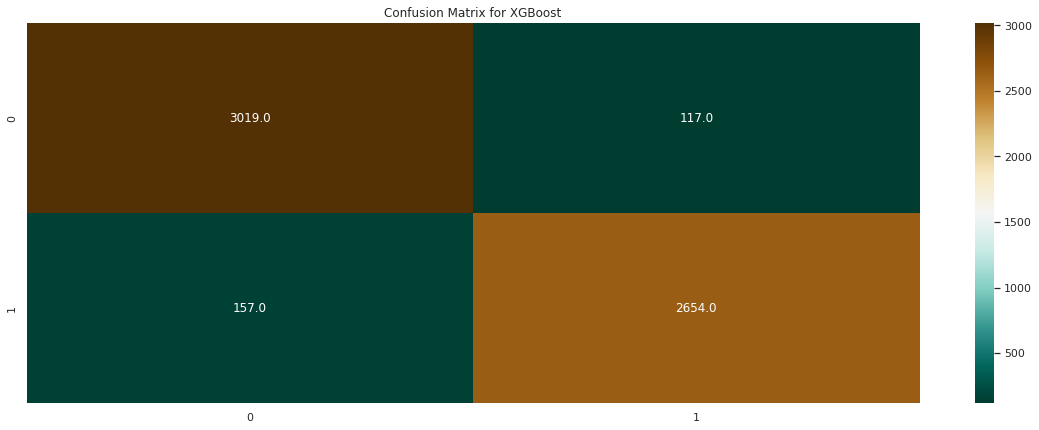

In [444]:
#Evaluation of the model
Y_pred = xg_model_gridcv_best.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="BrBG_r")
plt.title("Confusion Matrix for XGBoost")

In [445]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details("Grid Search CV- XGBoost",Y_test,Y_pred,metrics_df)

3.2.2 Gradient Boosting Machine

In [446]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(X_train,Y_train)

score=gbc.score(X_test,Y_test)
print(f'Gradient Boosting score : {score}')


Gradient Boosting score : 0.9517403732974609


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3136
           1       0.95      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.17403732974608%



Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting')

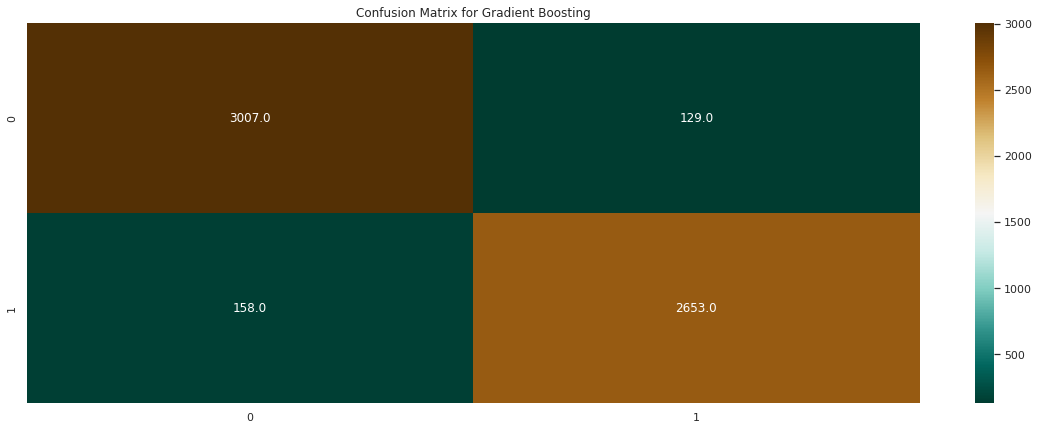

In [447]:
#Evaluation of the model
Y_pred = gbc.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="BrBG_r")
plt.title("Confusion Matrix for Gradient Boosting")

In [448]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details("Gradient Boosting ",Y_test,Y_pred,metrics_df)

Gradient Boosting Grid search cv

In [449]:
# Hyperparameter tuning.
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [450]:
gbc_gridseach_cv = GridSearchCV(estimator=gbc,
                       param_grid = param_dict,
                       cv = 5, verbose=2)
# Evaluating the optimal parameters.
gbc_gridseach_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END max_depth=6, min_sa

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  max_features=5,
                                                  n_estimators=500,
                                                  random_state=100),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [451]:
gbc_gridseach_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, max_features=5,
                           min_samples_leaf=40, min_samples_split=10,
                           random_state=100)

In [452]:
gbc_gridseach_cv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 10,
 'n_estimators': 100}

In [453]:
gbc_model_gridcv_best = gbc_gridseach_cv.best_estimator_

In [454]:
Y_pred = gbc_model_gridcv_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3136
           1       0.96      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.29174373633765%



Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting')

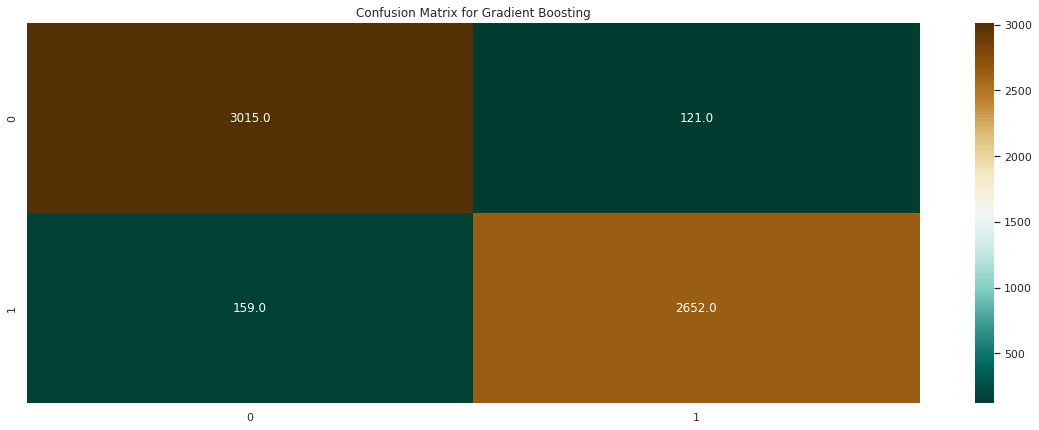

In [455]:
#Evaluation of the model
Y_pred = gbc_model_gridcv_best.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="BrBG_r")
plt.title("Confusion Matrix for Gradient Boosting")

In [456]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details("Grid Search CV-Gradient Boosting",Y_test,Y_pred,metrics_df)

**4. K-Nearest Neighbour Model**

In [457]:
# KNN model implementation.
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.9490499411467967

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3136
           1       0.95      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 94.90499411467968%



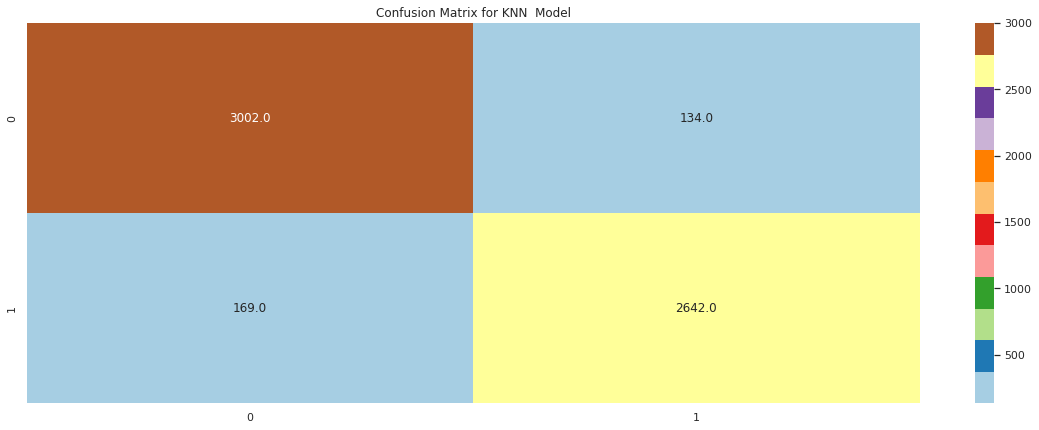

In [458]:
# Evaluation of the KNN model.
Y_pred = knn.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Paired")
plt.title("Confusion Matrix for KNN  Model")
plt.show()

In [459]:
# Adding model performance in evaluation metric dataframe.
metrics_df = add_metrics_details("KNN Model",Y_test,Y_pred,metrics_df)

**KNN GridSearchCV**

In [460]:
# Hyperparameter tuning.
knn_params = {'n_neighbors':np.arange(10,50,2)}
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])})

In [461]:
# Best estimator.
knn_cv.best_estimator_

KNeighborsClassifier(n_neighbors=30)

In [462]:
knn_cv_best = knn_cv.best_estimator_

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3136
           1       0.95      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.2412981335127%



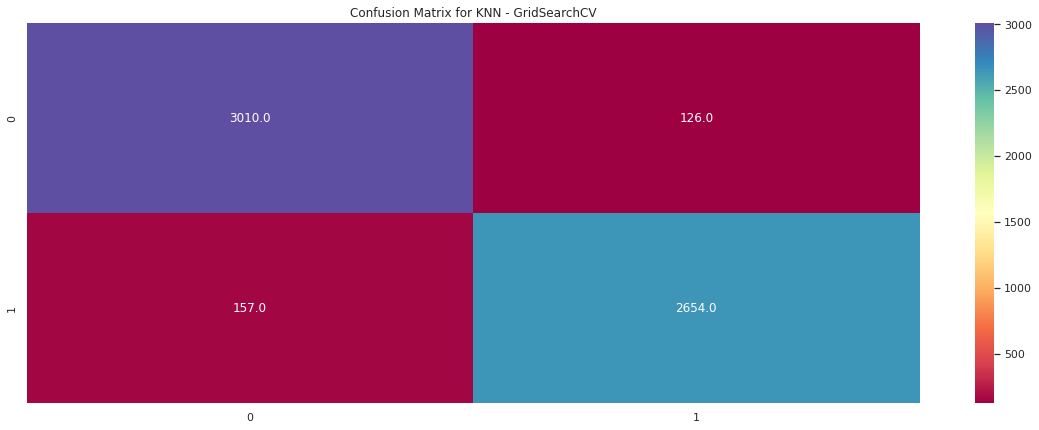

In [463]:
# Evaluation of the model.
Y_pred = knn_cv_best.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Spectral")
plt.title("Confusion Matrix for KNN - GridSearchCV")
plt.show()

In [464]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details("KNN - GridSearchCV",Y_test,Y_pred,metrics_df)

**5. Support Vector Machine**

In [465]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)

0.9540945014292921

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3136
           1       0.95      0.95      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.4094501429292%



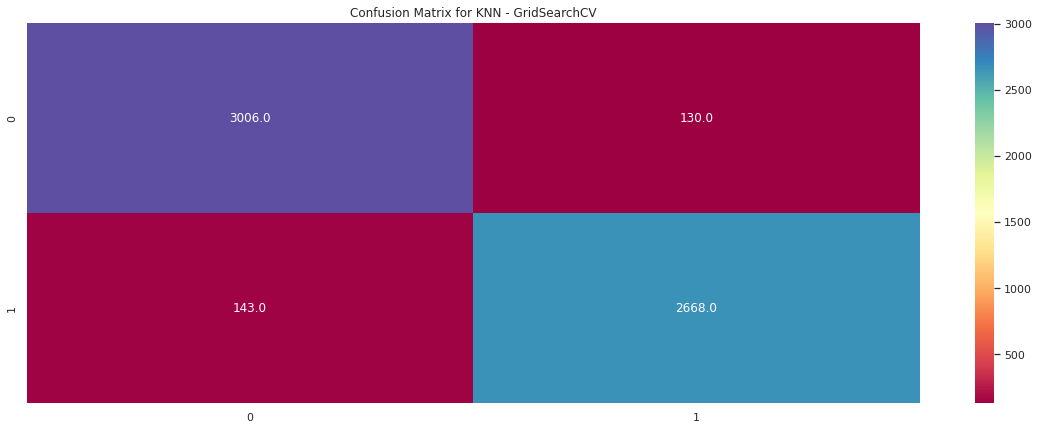

In [466]:
# Evaluation of the model.
Y_pred = svc.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Spectral")
plt.title("Confusion Matrix for KNN - GridSearchCV")
plt.show()

In [467]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details("Support Vector Machine",Y_test,Y_pred,metrics_df)

Naive Bayes Classifier

In [468]:
 # Sorting the dataset by high to low accuracy score.
metrics_df = metrics_df.sort_values("ACCURACY",ascending=False)
metrics_df = metrics_df.reset_index(drop=True)
metrics_df

# DataFrame clearly shows the winner model out of all though by a very minute margin and that is 'Random Forest - GridSearchCV'.
# 'Decision Tree' is the worst performer out of all.

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE,ROC AUC SCORE
0,Support Vector Machine,0.954095,0.949128,0.953538,0.951328,0.953837
1,Grid Search CV- XGBoost,0.953926,0.944148,0.957777,0.950914,0.953420
2,XGBoost,0.953422,0.945571,0.955428,0.950474,0.953015
3,Logistic Regression,0.952917,0.951263,0.949237,0.950249,0.952832
4,Grid Search CV-Gradient Boosting,0.952917,0.943436,0.956365,0.949857,0.952426
5,KNN - GridSearchCV,0.952413,0.944148,0.954676,0.949383,0.951985
6,Random Forest - GridSearchCV,0.952077,0.940946,0.956946,0.948879,0.951500
7,Gradient Boosting,0.951740,0.943792,0.953630,0.948686,0.951329
8,Decision Tree,0.950900,0.942725,0.952895,0.947783,0.950476
9,Random Forest,0.950900,0.940591,0.954857,0.947670,0.950365
